In [4]:
import sys
sys.path.append( '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages') # location of src 
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
# load the data
game_data = pd.read_csv("../data/game_stats.csv")
games = pd.read_csv("../data/games.csv")
games

,id,season,week,season_type,start_date,start_time_tbd,neutral_site,conference_game,attendance,venue_id,...,home_post_win_prob,away_id,away_team,away_conference,away_points,away_line_scores,away_post_win_prob,excitement_index,highlights,notes
0,332410135,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,44217.0,3953.0,...,0.448322,2439,UNLV,Mountain West,23.0,"[6, 7, 3, 7]",0.551678,5.598996,NaN,NaN
1,332410084,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,40278.0,3830.0,...,0.999811,282,Indiana State,NaN,35.0,"[7, 14, 7, 7]",0.000189,2.046742,NaN,NaN
2,332420127,2013,1,regular,2013-08-31T00:00:00.000Z,NaN,False,False,71214.0,3936.0,...,0.962311,2711,Western Michigan,Mid-American,13.0,"[0, 7, 0, 6]",0.037689,4.867190,NaN,NaN
3,332432132,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,36007.0,3854.0,...,0.995635,2509,Purdue,Big Ten,7.0,"[0, 7, 0, 0]",0.004365,2.774517,NaN,NaN
4,332430275,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,76306.0,347.0,...,0.981694,113,UMass,Mid-American,0.0,"[0, 0, 0, 0]",0.018306,1.924321,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,401282794,2021,13,regular,2021-11-27T05:00:00.000Z,1.0,False,True,NaN,3953.0,...,NaN,275,Wisconsin,Big Ten,NaN,NaN,NaN,NaN,NaN,NaN
898,401282785,2021,13,regular,2021-11-27T05:00:00.000Z,1.0,False,True,NaN,3936.0,...,NaN,213,Penn State,Big Ten,NaN,NaN,NaN,NaN,NaN,NaN
899,401282766,2021,13,regular,2021-11-27T05:00:00.000Z,1.0,False,True,NaN,6577.0,...,NaN,120,Maryland,Big Ten,NaN,NaN,NaN,NaN,NaN,NaN
900,401282753,2021,13,regular,2021-11-27T05:00:00.000Z,1.0,False,True,NaN,3907.0,...,NaN,84,Indiana,Big Ten,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
game_data


,id,home.rushingTDs,home.passingTDs,home.kickReturnYards,home.kickReturnTDs,home.kickReturns,home.kickingPoints,home.interceptionYards,home.interceptionTDs,home.passesIntercepted,...,away.yardsPerRushAttempt,away.totalPenaltiesYards,away.turnovers,away.fumblesLost,away.interceptions,away.possessionTime,home.puntReturnYards,home.puntReturnTDs,home.puntReturns,away.kickingPoints
0,401012867,0,1,13.0,0.0,1.0,11.0,13.0,0.0,1.0,...,3.0,6-46,2,1,1,19:05,NaN,NaN,NaN,NaN
1,401012810,4,3,14.0,0.0,1.0,7.0,32.0,0.0,3.0,...,5.8,3-25,5,2,3,22:08,15.0,0.0,1.0,8.0
2,401012884,0,1,28.0,0.0,2.0,1.0,NaN,NaN,NaN,...,3.5,9-99,2,2,0,40:58,17.0,0.0,2.0,3.0
3,401012857,3,1,19.0,0.0,1.0,4.0,1.0,0.0,1.0,...,4.8,3-40,1,0,1,26:02,10.0,0.0,3.0,9.0
4,401013332,4,3,32.0,0.0,2.0,9.0,0.0,0.0,1.0,...,3.5,8-80,1,0,1,30:58,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,333340084,2,6,126.0,0.0,5.0,8.0,NaN,NaN,NaN,...,1.9,6-46,0,0,0,25:44,NaN,NaN,NaN,6.0
841,333410127,1,3,69.0,0.0,3.0,10.0,NaN,NaN,NaN,...,6.8,5-62,0,0,0,26:46,16.0,0.0,1.0,6.0
842,400547960,4,1,33.0,0.0,2.0,6.0,17.0,0.0,1.0,...,2.5,6-28,3,2,1,29:51,57.0,1.0,5.0,2.0
843,400547993,0,5,155.0,0.0,7.0,8.0,9.0,0.0,1.0,...,5.0,8-78,1,0,1,33:17,5.0,0.0,3.0,11.0


In [7]:
combined_data = games.merge(game_data, left_on="id", right_on="id", validate="one_to_one")
combined_data

,id,season,week,season_type,start_date,start_time_tbd,neutral_site,conference_game,attendance,venue_id,...,away.yardsPerRushAttempt,away.totalPenaltiesYards,away.turnovers,away.fumblesLost,away.interceptions,away.possessionTime,home.puntReturnYards,home.puntReturnTDs,home.puntReturns,away.kickingPoints
0,332410135,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,44217.0,3953.0,...,5.7,1-15,2,0,2,31:56,15.0,0.0,1.0,5.0
1,332410084,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,40278.0,3830.0,...,3.4,7-83,2,1,1,27:42,90.0,1.0,4.0,5.0
2,332420127,2013,1,regular,2013-08-31T00:00:00.000Z,NaN,False,False,71214.0,3936.0,...,0.4,7-65,4,1,3,26:36,52.0,0.0,5.0,1.0
3,332432132,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,36007.0,3854.0,...,3.0,7-40,4,2,2,26:12,-2.0,0.0,4.0,1.0
4,332430275,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,76306.0,347.0,...,3.4,8-50,2,1,1,27:00,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,401282765,2021,4,regular,2021-09-25T19:30:00.000Z,0.0,False,False,NaN,3665.0,...,3.2,9-84,1,1,0,33:59,12.0,0.0,1.0,10.0
841,401282775,2021,4,regular,2021-09-25T19:30:00.000Z,0.0,False,True,NaN,3558.0,...,4.7,7-41,1,1,0,32:37,29.0,0.0,1.0,7.0
842,401282784,2021,4,regular,2021-09-25T23:00:00.000Z,0.0,False,True,NaN,3936.0,...,3.9,7-50,2,1,1,37:14,62.0,1.0,1.0,8.0
843,401282811,2021,4,regular,2021-09-25T23:30:00.000Z,0.0,False,False,NaN,3861.0,...,1.9,4-18,2,0,2,36:24,-1.0,0.0,2.0,1.0


In [8]:

def point_diff(row):
    return row["home_points"] - row["away_points"]


combined_data["point_differential"] = combined_data.apply(point_diff, axis=1)combined_data["point_differential"]

0      28.0
1      38.0
2      13.0
3      35.0
4      45.0
       ... 
840    21.0
841     7.0
842     3.0
843    52.0
844    -2.0
Name: point_differential, Length: 845, dtype: float64

Text(0.5, 1.0, 'Away Team Turnovers vs Point Differential')

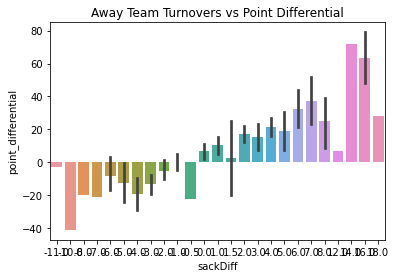

In [21]:

def sack_diff(row):
    return row["home.sacks"] - row["away.sacks"]

combined_data["sackDiff"] = combined_data.apply(sack_diff, axis=1)
sns.barplot(
    data=combined_data, x="sackDiff", y="point_differential"
).set_title("Away Team Turnovers vs Point Differential")

Text(0.5, 1.0, 'Away Team Turnovers vs Point Differential')

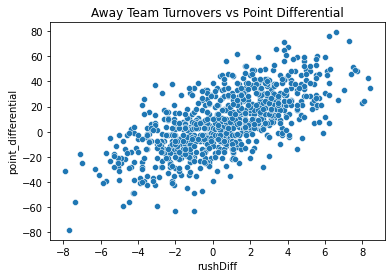

In [25]:
def rush_diff(row):
    return row["home.yardsPerRushAttempt"] - row["away.yardsPerRushAttempt"]

combined_data["rushDiff"] = combined_data.apply(rush_diff, axis=1)
    

sns.scatterplot(
    data=combined_data, x="rushDiff", y="point_differential"
).set_title("Away Team Turnovers vs Point Differential")

Text(0.5, 1.0, 'Away Team Turnovers vs Point Differential')

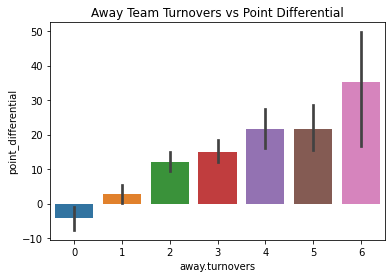

In [15]:
sns.barplot(
    data=combined_data, x="away.turnovers", y="point_differential"
).set_title("Away Team Turnovers vs Point Differential")